In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load data from a specific worksheet in the Excel file
excel_path = "Alignment Case Study v1.0.xlsx"
sheet_name = "1. Physician Level Data"  # Replace with the actual sheet name

data = pd.read_excel(excel_path, sheet_name=sheet_name)


In [15]:
data.head()

,Physician ID,Physician pd.NAme,Specialty,Jan'23,Feb'23,Mar'23,Apr'23,May'23,Jun'23,Jan'23.1,Feb'23.1,Mar'23.1,Apr'23.1,May'23.1,Jun'23.1,total f,totalM
0,51019201.0,Rahul pd.NAik,SURGICAL ONCOLOGY,12.0,13.0,31.0,28.0,28.0,48.0,1.0,24.0,35.0,38.0,47.0,55.0,160.0,200.0
1,61507774.0,ALBERT PARK,RADIOLOGY ONCOLOGY,12.0,11.0,29.0,25.0,27.0,44.0,12.0,11.0,12.0,15.0,33.0,43.0,148.0,126.0
2,82693360.0,ELLICE WONG,RADIOLOGY ONCOLOGY,1.0,11.0,33.0,32.0,40.0,39.0,13.0,13.0,11.0,35.0,46.0,38.0,156.0,156.0
3,14600351.0,KANISHKA CHAKRABORTY,HEMATOLOGY/ONCOLOGY,3.0,19.0,16.0,19.0,31.0,30.0,25.0,10.0,37.0,40.0,37.0,44.0,118.0,193.0
4,28190162.0,BRENDA SHOO,RADIOLOGY ONCOLOGY,12.0,16.0,18.0,32.0,35.0,42.0,2.0,14.0,13.0,19.0,42.0,45.0,155.0,135.0


In [16]:
#question 1 :
data = data.replace('-', pd.NA)

# Count null values in each column
null_sum = data.isnull().sum()

# Count duplicated values in each column
duplicated_sum = data.duplicated().sum()

print("Sum of Null Values:")
print(null_sum)

print("\nSum of Duplicated Rows:")
print(duplicated_sum)

Sum of Null Values:
Physician ID         1032577
Physician pd.NAme    1032577
Specialty            1032577
Jan'23               1032575
Feb'23               1032576
Mar'23               1032576
Apr'23               1032576
May'23               1032576
Jun'23               1032576
Jan'23.1             1032576
Feb'23.1             1032576
Mar'23.1             1032576
Apr'23.1             1032576
May'23.1             1032576
Jun'23.1             1032576
total f              1032577
totalM               1032577
dtype: int64

Sum of Duplicated Rows:
1032574


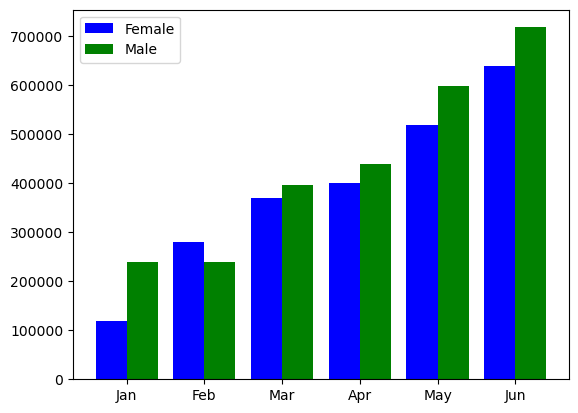

In [33]:
#Question 2:

import numpy as np
_team = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun']
Fludara = [119815, 279707, 369973, 399490, 519490,638224]
Mercepto = [239551, 239771, 396317, 439458, 599216,718201]
X_axis = np.arange(len(_team))

# Multiple colors of bars
plt.bar(X_axis -0.2, Fludara, width=0.4, 
        label = 'Female', color='b')
plt.bar(X_axis +0.2, Mercepto, width=0.4, 
        label = 'Male', color='g')

# Xticks
plt.xticks(X_axis, _team)

# Adding legend to the plot
plt.legend()

# Display the plot
plt.show()


In [45]:
#Question 5

import pandas as pd

physician_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='1. Physician Level Data')
affiliation_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='2. Affiliation')

# Merge the two sheets on "Physician ID"
merged_data = pd.merge(physician_data, affiliation_data, on='Physician ID')

# List of specialties of interest
specialties = ["HEMATOLOGY", "HEMATOLOGY/ONCOLOGY", "ONCOLOGY MEDICAL", "PEDIATRIC HEMATOLOGY ONCOLOGY"]

# Filter data to include only the specified specialties
filtered_data = merged_data[merged_data['Specialty'].isin(specialties)]

# Group by hospital and specialty, then count physicians in each group
grouped_data = filtered_data.groupby(['Hospital ID', 'Hospital Name', 'Specialty'])['Physician ID'].count().reset_index()

# Pivot the table to have specialties as columns
pivot_table = grouped_data.pivot_table(index=['Hospital ID', 'Hospital Name'], columns='Specialty', values='Physician ID', fill_value=0)

# Calculate the total count of physicians across the specified specialties
pivot_table['Total Physicians'] = pivot_table.sum(axis=1)

# Sort hospitals based on the total count of physicians and select the top 5
top_hospitals = pivot_table.nlargest(5, 'Total Physicians')

print(top_hospitals)


Specialty                                                HEMATOLOGY  \
Hospital ID Hospital Name                                             
AC713       OSF Moeller Cancer Center                             2   
AC687       Nashville Oncology Associates                         2   
AC545       Bryan Medical Center                                  2   
AC621       Mission Cancer and Blood                              3   
AC750       Childrens Hospital And Medical Center Omaha           3   

Specialty                                                HEMATOLOGY/ONCOLOGY  \
Hospital ID Hospital Name                                                      
AC713       OSF Moeller Cancer Center                                      3   
AC687       Nashville Oncology Associates                                  3   
AC545       Bryan Medical Center                                           4   
AC621       Mission Cancer and Blood                                       3   
AC750       Childrens 

In [46]:
#Question 6

import pandas as pd

# Load the data from the Excel sheets
physician_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='1. Physician Level Data')
affiliation_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='2. Affiliation')
ztt_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='3. ZTT')

# Merge physician data with affiliation data to get territory information
merged_data = pd.merge(physician_data, affiliation_data, on='Physician ID', how='left')

# Merge with ZTT data to get territory names
merged_data = pd.merge(merged_data, ztt_data, left_on='Hospital ZIP', right_on='ZIP', how='left')

# Group by territory and sum up the sales
sales_by_territory = merged_data.groupby('Territory_Name')[['Jan\'23', 'Feb\'23', 'Mar\'23', 'Apr\'23', 'May\'23', 'Jun\'23']].sum()

# Calculate total sales across all territories
total_sales_across_territories = sales_by_territory.sum().sum()

# Calculate the rescaling factor
rescaling_factor = 54000 / total_sales_across_territories

# Calculate the workload index for each territory
workload_index = (sales_by_territory * rescaling_factor).sum(axis=1)

# Print or use the workload index data
print(workload_index)


Territory_Name
Atlanta, GA               764.763725
Baltimore, MD             774.754634
Bethesda, MD             1051.049185
Birmingham, AL            959.934322
Boston, MA               1113.666302
Buffalo, NY               956.817381
Charleston, SC           1362.019704
Charlotte, NC            1217.582887
Chicago North             992.049945
Chicago South            1182.350322
Cincinnati, OH            607.914804
Cleveland, OH            1029.982003
Columbus, OH              730.338225
Dallas, TX                876.305683
Denver, CO               1295.840368
Detroit, MI              1249.002764
Fort Worth, TX           1090.150096
Harrisburg, PA            822.454962
Houston, TX               968.617229
Hudson Valley, NY         600.957346
Indiana                  1276.665615
Jacksonville, FL          815.497505
Kansas City, KS          1074.398412
Kentucky                  764.040149
Las Vegas, NV            1175.003247
Long Island, NY          1116.115327
Los Angeles North, CA  

In [47]:
#Question 7

import pandas as pd

# Load the data from the Excel sheets
physician_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='1. Physician Level Data')
affiliation_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='2. Affiliation')
ztt_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='3. ZTT')

# Merge physician data with affiliation data to get territory information
merged_data = pd.merge(physician_data, affiliation_data, on='Physician ID', how='left')

# Merge with ZTT data to get territory names
merged_data = pd.merge(merged_data, ztt_data, left_on='Hospital ZIP', right_on='ZIP', how='left')

# Group by territory and sum up the sales
sales_by_territory = merged_data.groupby('Territory_Name')[['Jan\'23', 'Feb\'23', 'Mar\'23', 'Apr\'23', 'May\'23', 'Jun\'23']].sum()

# Calculate total sales across all territories
total_sales_across_territories = sales_by_territory.sum().sum()

# Calculate the rescaling factor
rescaling_factor = 54000 / total_sales_across_territories

# Calculate the workload index for each territory
workload_index = (sales_by_territory * rescaling_factor).sum(axis=1)

# Filter territories within the balanced workload index range
balanced_territories = workload_index[(workload_index >= 700) & (workload_index <= 1300)]

# Calculate the number of territories above and below the balanced range
above_balanced = len(workload_index[workload_index > 1300])
below_balanced = len(workload_index[workload_index < 700])

# Print the results
print(f"Number of territories above balanced range: {above_balanced}")
print(f"Number of territories below balanced range: {below_balanced}")


Number of territories above balanced range: 6
Number of territories below balanced range: 7


In [48]:
workload_index.sum()

53999.99999999999

In [49]:
workload_index.head()

Territory_Name
Atlanta, GA        764.763725
Baltimore, MD      774.754634
Bethesda, MD      1051.049185
Birmingham, AL     959.934322
Boston, MA        1113.666302
dtype: float64

In [50]:
workload_index.tail()

Territory_Name
San Francisco N, CA    1272.852929
Seattle N, WA           548.748585
Seattle S, WA           694.576894
St. Louis, MO           982.726952
Tampa, FL              1263.140318
dtype: float64

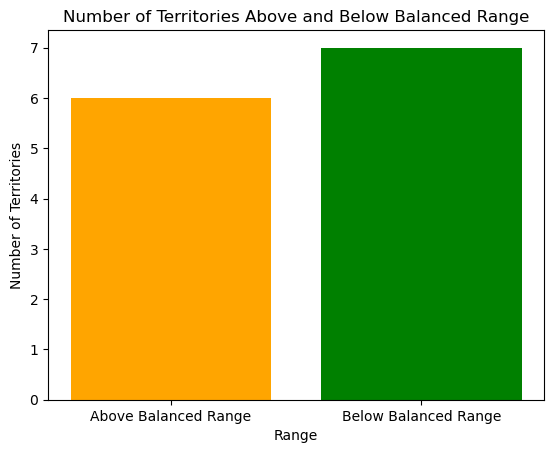

In [52]:
plt.bar(['Above Balanced Range', 'Below Balanced Range'], [above_balanced, below_balanced], color=['orange', 'green'])
plt.title('Number of Territories Above and Below Balanced Range')
plt.xlabel('Range')
plt.ylabel('Number of Territories')
plt.savefig('territories_balance.png')
plt.show()

         Physician ID        Physician Name  Fludara_Sales  Mercapto_Sales
0          51019201.0         Rahul pd.NAik          160.0           160.0
1          61507774.0           ALBERT PARK          148.0           148.0
2          82693360.0           ELLICE WONG          156.0           156.0
3          14600351.0  KANISHKA CHAKRABORTY          118.0           118.0
4          28190162.0           BRENDA SHOO          155.0           155.0
...               ...                   ...            ...             ...
1048566           NaN                   NaN            0.0             0.0
1048567           NaN                   NaN            0.0             0.0
1048568           NaN                   NaN            0.0             0.0
1048569           NaN                   NaN            0.0             0.0
1048570           NaN                   NaN       239834.0        239834.0

[1048571 rows x 4 columns]


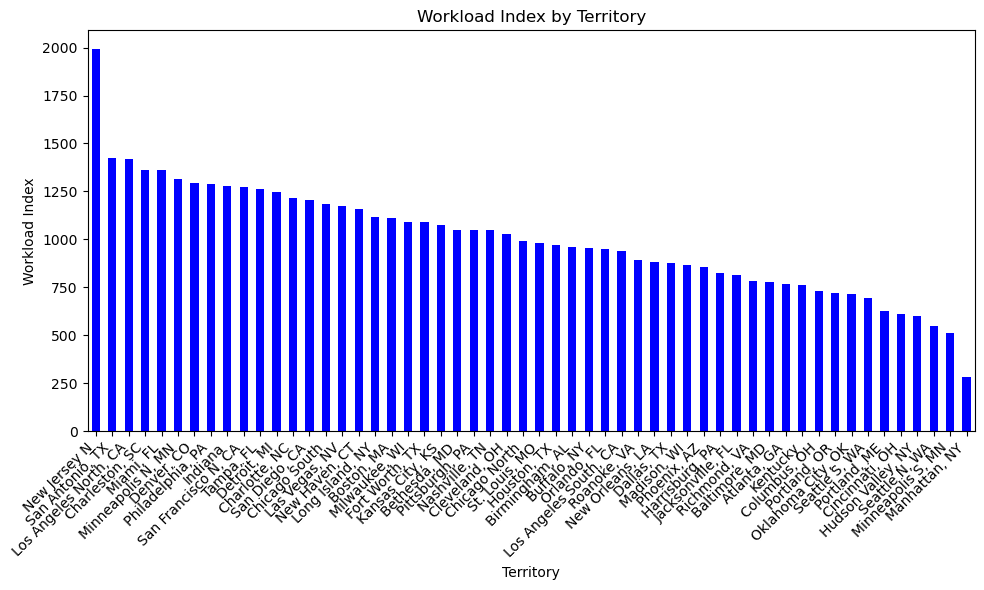

The region performing best based on 'Fludara' sales is: East


In [56]:
#Question 8

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel sheets
physician_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='1. Physician Level Data')
affiliation_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='2. Affiliation')
ztt_data = pd.read_excel('Alignment Case Study v1.0.xlsx', sheet_name='3. ZTT')
# ----------------------------------------------------------------------------------------------------------
# Sum up the monthly sales for Fludara and Mercapto
physician_data['Fludara_Sales'] = physician_data[["Jan'23", "Feb'23", "Mar'23", "Apr'23", "May'23", "Jun'23"]].sum(axis=1)
physician_data['Mercapto_Sales'] = physician_data[["Jan'23", "Feb'23", "Mar'23", "Apr'23", "May'23", "Jun'23"]].sum(axis=1)

# Print or use the updated physician_data DataFrame
print(physician_data[['Physician ID', 'Physician Name', 'Fludara_Sales', 'Mercapto_Sales']])

# --------------------------------------------------------------------------------------------------------
# Merge physician data with affiliation data to get territory information
merged_data = pd.merge(physician_data, affiliation_data, on='Physician ID', how='left')

# Merge with ZTT data to get territory names and region names
merged_data = pd.merge(merged_data, ztt_data, left_on='Hospital ZIP', right_on='ZIP', how='left')

# Group by territory and sum up the sales
sales_by_territory = merged_data.groupby('Territory_Name')[["Jan'23", "Feb'23", "Mar'23", "Apr'23", "May'23", "Jun'23"]].sum()

# Calculate total sales across all territories
total_sales_across_territories = sales_by_territory.sum().sum()

# Calculate the rescaling factor
rescaling_factor = 54000 / total_sales_across_territories

# Calculate the workload index for each territory
workload_index = (sales_by_territory * rescaling_factor).sum(axis=1)
# Sort the workload index in descending order
sorted_workload_index = workload_index.sort_values(ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
sorted_workload_index.plot(kind='bar', color='blue')
plt.title('Workload Index by Territory')
plt.xlabel('Territory')
plt.ylabel('Workload Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Identify the region performing best based on "Fludara" sales
region_fludara_sales = merged_data.groupby('Region_Name')['Fludara_Sales'].sum()
best_region_fludara = region_fludara_sales.idxmax()

plt.savefig('workload.png')

plt.show()

print(f"The region performing best based on 'Fludara' sales is: {best_region_fludara}")
